<a href="https://colab.research.google.com/github/ousef777/Homework-4/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

torch.set_printoptions(edgeitems=2, linewidth=75)
torch.manual_seed(123)

In [114]:
from torchvision import datasets
from torchvision import transforms
cifar10 = datasets.CIFAR10('data', train=True, download=True,
                          transform=transforms.ToTensor())

Files already downloaded and verified


In [60]:
img, _ = cifar10[90]
type(img)

torch.Tensor

In [61]:
img.shape

torch.Size([3, 32, 32])

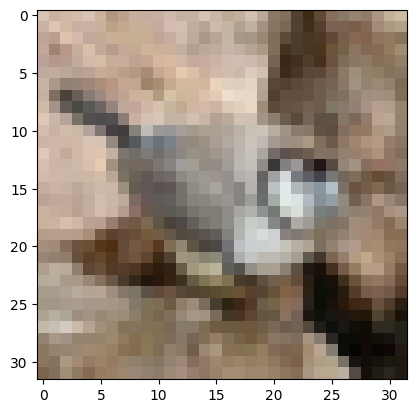

In [63]:
plt.imshow(img.permute(1, 2, 0))
plt.show()

In [64]:
imgs = torch.stack([img for img, _ in cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [65]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [66]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [115]:
cifar10 = datasets.CIFAR10('data', train=True, download=False,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

cifar10_val = datasets.CIFAR10('data', train=False, download=False,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

In [144]:
# In[5]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label]) for img, label in cifar10 if label in [0, 2]][:10]
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]][:10]

In [145]:
plane = [(img, label_map[label]) for img, label in cifar10 if label in [0]][:5]
bird = [(img, label_map[label]) for img, label in cifar10 if label in [2]][:5]
cifar2 = plane + bird

In [146]:
plane = [(img, label_map[label]) for img, label in cifar10_val if label in [0]][:5]
bird = [(img, label_map[label]) for img, label in cifar10_val if label in [2]][:5]
cifar2_val = plane + bird

In [147]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=10, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 1

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch % 1 == 0):
      print("Epoch: %d, Loss: %.5f" % (epoch, float(loss)))
      #print("%.5f" % float(loss))

Epoch: 0, Loss: 0.82698


In [150]:
torch.save(model, "model.h5")